In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

np.random.seed(123) #ensure reproducibility

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Column Description [Link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv)  
id: ID number  
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)  
radius_mean: mean of distances from center to points on the perimeter  
texture_mean: standard deviation of gray-scale values  
perimeter_mean: mean size of the core tumor  
area_mean  
smoothness_mean: mean of local variation in radius lengths  
compactness_mean: mean of perimeter^2 / area - 1.0  
concavity_mean: mean of severity of concave portions of the contour  
concave points_mean: mean for number of concave portions of the contour  
symmetry_mean  
fractal_dimension_mean: mean for "coastline approximation" - 1  
radius_se: standard error for the mean of distances from center to points on the perimeter  
texture_se: standard error for standard deviation of gray-scale values  
perimeter_se  
area_se  
smoothness_se: standard error for local variation in radius lengths  
compactness_se: standard error for perimeter^2 / area - 1.0  
concavity_se: standard error for severity of concave portions of the contour  
concave points_se: standard error for number of concave portions of the contour  
symmetry_se  
fractal_dimension_se: standard error for "coastline approximation" - 1  
radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter  
texture_worst: "worst" or largest mean value for standard deviation of gray-scale values  
perimeter_worst  
area_worst  
smoothness_worst: "worst" or largest mean value for local variation in radius lengths  
compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0  
concavity_worst: "worst" or largest mean value for severity of concave portions of the contour  
concave points_worst: "worst" or largest mean value for number of concave portions of the contour  
symmetry_worst  
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1  

In [4]:
# rearrange columns, remove ID and Unnamed: 32
fixed_columns = list(df.columns[2:-1])+[df.columns[1]] 
df_data = df[fixed_columns]
df_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
# Convert (M=malignant, B=benign) to (1,0)
pd.options.mode.chained_assignment = None  #hide any pandas warnings
df_data.loc[df_data.index[df_data['diagnosis']=='B'],'diagnosis'] = 0
df_data.loc[df_data.index[df_data['diagnosis']=='M'],'diagnosis'] = 1

In [6]:
df_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
feature_names = df_data.columns[:-1].tolist()
X = df_data[df_data.columns[:-1]].values
y = df_data['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=10) #split the data

In [8]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
y_predict = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [12]:
confusion_matrix_arr = confusion_matrix(y_test, y_pred)
confusion_matrix_arr

array([[73,  2],
       [ 1, 38]], dtype=int64)

In [19]:
total=sum(sum(confusion_matrix_arr))

accuracy = (confusion_matrix_arr[0,0]+confusion_matrix_arr[1,1])/total
print('Accuracy: {:.2f}'.format(accuracy))

sensitivity = confusion_matrix_arr[0,0]/(confusion_matrix_arr[0,0]+confusion_matrix_arr[1,0])
print('Sensitivity: {:.2f}'.format(sensitivity))

specificity = confusion_matrix_arr[1,1]/(confusion_matrix_arr[1,1]+confusion_matrix_arr[0,1])
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.97
Sensitivity: 0.99
Specificity: 0.95


AUC of ROC: 0.99


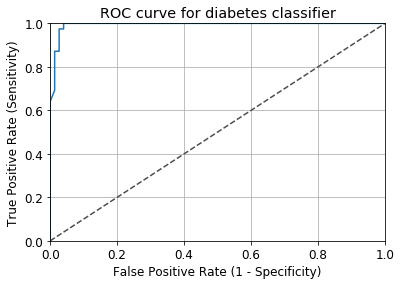

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('AUC of ROC: {:.2f}'.format(auc(fpr, tpr)))


fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear',class_weight = 'balanced').fit(X_train,y_train)
y_LR = LR.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_LR = accuracy_score(y_test, y_LR)
f1_LR = f1_score(y_test, y_LR, pos_label=1)
print('Accuracy:{:.2f}; F1-score:{:.2f}'.format(acc_LR,f1_LR))

Accuracy:0.93; F1-score:0.90
